[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/IPML/blob/master/tutorial_notebooks/resale_price_forecasting_case_study.ipynb)


# Introduction to Data Analysis with the Resale Price Prediction Dataset

The lecture introduced you to the problem of resale price forecasting to support decision-making in the leasing business. In this tutorial, we will explore the resale price prediction in more detail by going through the various stages of the machine learning process, from initial data exploration and explanatory data analysis (EDA) to sophisticated predictive modeling and insightful post-hoc analysis. The purpose of this notebook is to give you a feeling of how a standard (supervised) ML workflow looks like in Python.

Here's a brief overview of what you'll encounter in this tutorial:

1. Data Exploration: We start our journey by diving into Exploratory Data Analysis (EDA), where we'll see how to use visual and statistical methods to understand our data's main characteristics. This foundational step helps us discern the story our data tells, guiding our subsequent steps.
   
2. Explanatory Modeling: Next, we transition into building an explanatory model, where we'll create and assess a regression model to understand the relationships within our data. This process involves not just building the model but also interpreting the results, providing us with valuable insights into the dataset's features.

3. Predictive Modeling: Armed with insights from our explanatory model, we'll move into predictive modeling. Here, the aim shifts to creating models that can predict new outcomes based on the data. We'll employ two different approaches – a Linear Regression model using sklearn and a gradient boosting model using XGBoost – to harness the power of these advanced algorithms.
   
4. Post-hoc Analysis: After our models are built and validated, we'll delve into post-hoc analysis, dissecting the models' decisions and interpreting their significance. This stage enhances our understanding of model behavior and the importance of different features, reinforcing the concept that effective machine learning involves both prediction and interpretation.
   
5. Exercises: Lastly, you'll find a section of exercises designed to test your understanding and reinforce the concepts discussed. These practical challenges encourage you to engage directly with the code and concepts, solidifying your learning experience.

As we proceed, remember that this notebook isn't just a place to read code – it's an interactive environment where you can run cells, alter code, and see the results immediately. You're encouraged to play around, make mistakes, ask questions, and most importantly, enjoy the process of discovery.

Certainly, you are going to encounter many new concepts throughout this tutorial, and it's completely natural to feel overwhelmed at times. We do not expect you to understand everything right away. In fact, many future tutorial sessions are designed to delve into the individual components and concepts introduced here, providing a more detailed foundation and context to enhance your comprehension. This notebook is just the beginning; it's a launchpad that will propel you into the vast universe of machine learning. So, take everything in stride, stay curious, and remember, every expert was once a beginner. 


---

# Section 1: Data Exploration

Before we dive into complex algorithms and predictive models, it's paramount to understand the data we're working with. This stage, often termed Exploratory Data Analysis (EDA), involves summarizing the main characteristics of datasets through various methods, primarily visual techniques. Here, we'll explore the fundamental aspects of EDA using tools like histograms to understand data distributions, correlation heatmaps to spot any potential relationships or patterns within the data, and more. By the end of this section, you'll have a foundational understanding of your dataset's structure, variables, and the relationships between them, preparing you for the next steps in your machine learning journey.

## Loading  the Resale Price Prediction Dataset

The data we will be working with in this tutorial is the Resale Price Prediction dataset. You can find the dataset on both on our Moodle page and in our GitHub repository. The Resale Price Prediction dataset focuses on laptops that have been leased and returned, aiming to predict their resale prices. The resale price is influenced by various factors, including the original retail price, depreciation, release year, screen size, hard drive size, RAM size, weight, lease duration, and battery capacity. By leveraging these multiple features, the goal is to develop a predictive model that accurately estimates the resale value of laptops, providing valuable insights for effective pricing strategies in the secondary market. 



In [1]:
import pandas as pd  # load Pandas library, the go-to library for working with data sets in Python

# We put the data on the web so you can download it easily
url = 'https://raw.githubusercontent.com/Humboldt-WI/IPML/main/data/resale_price_dataset.csv'

# We will use pandas read_csv method to read data right from the web
data = pd.read_csv(url)

In [2]:
# Please note, you can use the same function to read data from your hard disk.
# This is faster and does not require a working internet connection.
# Here is an example, which assumes that the data file is stored in a sub-folder called data.
# To run the code, simply remove the hashtag 
#data = pd.read_csv('../data/resale_price_dataset.csv')

Let's first take a look at the data. To that end, we use the function `.head()`, which creates a preview of the data.

In [4]:
# The head function is used to display the first few rows of the dataset after it has been loaded into a pandas DataFrame format
data.head()

,Brand,Model,Release year,Screen size (inches),Hard drive size (GB),RAM size (GB),Weight (grams),Retail price,Industry,Contract Lease Duration (months),Actual Lease Duration (months),Battery capacity (%),Observed resale price
0,Crest,Elevation Elite,2016,15,512,16,1150,2699,Automotive and Transportation,60,63,87.90,751
1,Crest,Elevation Elite,2016,15,512,16,1150,2719,Healthcare,6,5,95.59,2599
2,Crest,Elevation Elite,2016,15,512,16,1150,2759,Automotive and Transportation,24,27,95.05,1358
3,Crest,Elevation Elite,2016,15,512,16,1150,2639,Automotive and Transportation,36,31,94.66,1166
4,Crest,Elevation Elite,2016,15,512,16,1150,2659,Agriculture and Farming,12,10,89.12,1915


## Descriptive Statistics

As we dive deeper into the vast world of data exploration, it's essential to pause and understand the fundamental attributes of our dataset. Enter the realm of Descriptive Statistics – a powerful tool that provides a concise summary of the main characteristics of our data, offering a quick snapshot and insight without the need to delve into complex visualizations or computations.

Our journey begins with the ```pd.DataFrame.info()``` method, a vital first step that reveals the high-level structure of our dataframe. This function provides us with essential details such as the number of entries (eg, rows), the data types of each feature (ie, column), and the amount of non-null values. Understanding this information is crucial as it sets the stage for further analysis and preprocessing by giving us a clear picture of our dataset's composition, especially concerning data types and missing values.

Next, we'll harness the power of the ```pd.DataFrame.describe()``` method, a convenient Pandas function that computes a suite of summary statistics for each column in our dataset. Whether you're curious about the average resale price of the laptops, the range of RAM sizes, or the variance in battery capacities, describe() offers a comprehensive overview at a glance.

But why are these steps essential? Both ```info()``` and ```describe()``` help us establish a foundational understanding of our dataset's distribution, scale, and tendencies. While ```info()``` gives us a structural overview, ```describe()``` takes us a step further into the statistical nature of each column. By noting aspects like the mean, standard deviation, and various percentiles, we can swiftly detect outliers, identify patterns, and formulate hypotheses for further investigation.

Together, these methods serve as our initial checkpoint, ensuring that we're not only aware of the dataset's composition but also intimately acquainted with its statistical properties. This knowledge is instrumental in guiding our next steps, be it data cleaning, feature selection, or exploratory analysis, as we progress further into our data exploration journey.

In [5]:
data.info() # Obtain information about the structure and characteristics of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Brand                             5000 non-null   object 
 1   Model                             5000 non-null   object 
 2   Release year                      5000 non-null   int64  
 3   Screen size (inches)              5000 non-null   int64  
 4   Hard drive size (GB)              5000 non-null   int64  
 5   RAM size (GB)                     5000 non-null   int64  
 6   Weight (grams)                    5000 non-null   int64  
 7   Retail price                      5000 non-null   int64  
 8   Industry                          5000 non-null   object 
 9   Contract Lease Duration (months)  5000 non-null   int64  
 10  Actual Lease Duration (months)    5000 non-null   int64  
 11  Battery capacity (%)              5000 non-null   float64
 12  Observ

In [6]:
data.describe() # Compute summary statistics for all columns of a dataframe object

,Release year,Screen size (inches),Hard drive size (GB),RAM size (GB),Weight (grams),Retail price,Contract Lease Duration (months),Actual Lease Duration (months),Battery capacity (%),Observed resale price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2017.121200,14.344000,466.772000,9.396800,1043.571200,2252.572000,28.069200,27.521800,89.529922,1199.526800
std,0.956605,2.501223,333.350319,4.999155,198.075846,991.656229,16.039285,16.273122,6.047601,649.126955
min,2015.000000,11.000000,128.000000,4.000000,692.000000,649.000000,6.000000,3.000000,53.960000,0.000000
25%,2017.000000,12.000000,256.000000,4.000000,892.000000,1509.000000,12.000000,12.000000,86.267500,725.000000
50%,2017.000000,14.000000,256.000000,8.000000,1010.000000,2019.000000,24.000000,25.000000,90.760000,1069.000000
75%,2018.000000,17.000000,512.000000,16.000000,1188.000000,2919.000000,36.000000,38.000000,93.982500,1529.000000
max,2018.000000,19.000000,1028.000000,16.000000,1530.000000,5719.000000,60.000000,75.000000,99.470000,4550.000000


## Data visualisation

In this subsection, we take a graphical approach to understand our Resale Price Prediction dataset. For this purpose we first load the two most prominent libraries for data visualization – Matplotlib and Seaborn.

**Matplotlib**: A foundational plotting library, Matplotlib is the granddaddy of Python visualization tools. It offers immense flexibility and allows us to create a wide variety of charts and plots with fine-grained control over every aspect of the visuals. Whether it's histograms, scatter plots, or line charts, Matplotlib provides the functionalities to craft them all with detailed customizations.

**Seaborn**: Built on top of Matplotlib, Seaborn brings sophistication and simplicity to our visualizations. It's known for its stunning color palettes, elegant designs, and ease of use. While it integrates closely with Matplotlib, Seaborn simplifies many complex visual tasks, making sophisticated plots accessible and understandable. Notably, it excels in handling and representing complex datasets and statistical models — from heatmaps to regression line plots.


In [9]:
# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Histograms

Our first stop is the world of histograms — a type of plot that lets us see the frequency distribution of a single variable. By plotting histograms for all the features in our dataset, we can visually grasp the distribution of data points and detect any skewness or anomalies that might exist. This understanding is crucial as it directly influences how certain machine learning models might perform with our data.

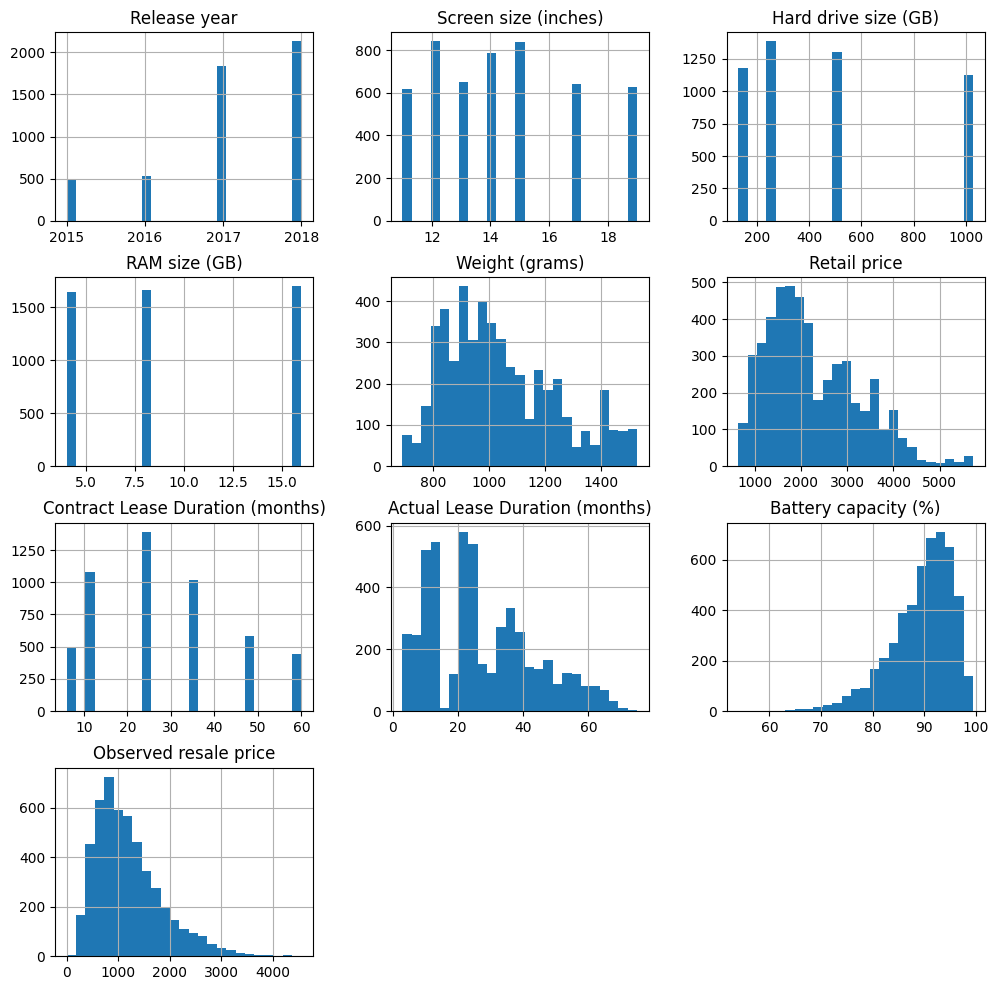

In [8]:
data.hist(figsize=(12, 12), bins=25);

### Correlation matrix

Next, we navigate to the realm of correlation heatmaps, which allow us to visualize the correlation matrix. Imagine being able to see, at a glance, how all the features in our dataset interact with one another. Are certain variables strongly positively correlated? Are others inversely related? These relationships, often non-discernable from raw numbers, become strikingly clear with a correlation heatmap. This step is invaluable, as understanding feature relationships can guide our feature selection and provide insights into the potential collinearity in our models.

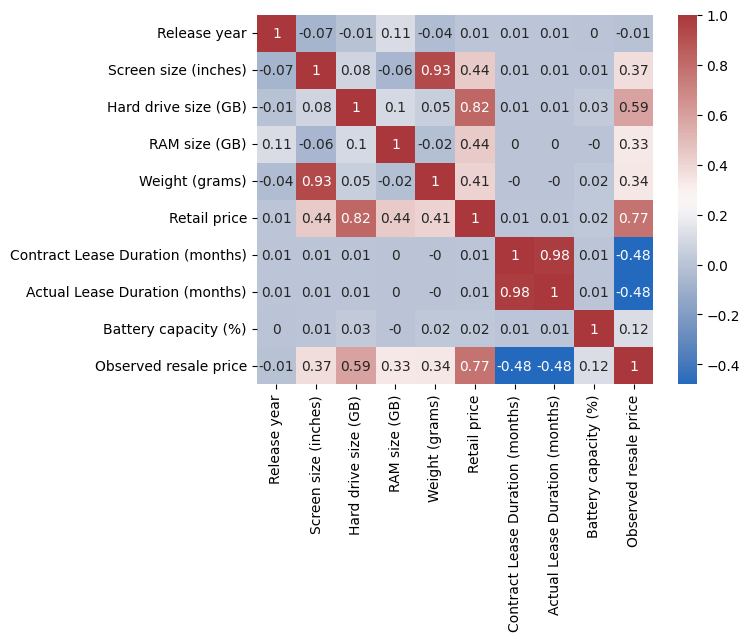

In [9]:
# Recall that our data has both, numerical (e.g. price) and categorical (e.g., brand) information.
# Correlation is defined for numerical data only. Therefore, we first extract only the numerical
# columns from the data frame
numeric_data = data.select_dtypes(include=['number'])

# compute correlations
correlations = numeric_data.corr().round(2)  # note the beauty of pandas. We just 'ask' our data frame to give us 
                                     # the correlations among features; very easy-to-read code     
# plot correlation heatmap
sns.heatmap(correlations, cmap='vlag', annot=True);

In [10]:
# Correlations of features with target:
print(correlations['Observed resale price'].iloc[:-1])

Release year                       -0.01
Screen size (inches)                0.37
Hard drive size (GB)                0.59
RAM size (GB)                       0.33
Weight (grams)                      0.34
Retail price                        0.77
Contract Lease Duration (months)   -0.48
Actual Lease Duration (months)     -0.48
Battery capacity (%)                0.12
Name: Observed resale price, dtype: float64


Interpretation:

- Correlation ranges from -1 to 1, with 1 indicating a perfect positive relationship, 0 indicating no relationship and -1 indicating a perfect negative relationship.
- Unsurprisingly, the original list price has a high positive relationship with the resale price.
- But there are other factors that are correlated, such as, most prominently, hard drive size.
- The duration of the lease has a negative relationship with the resale price. This also comes as no surprise.
- It is noteworthy that the correlations of contract and actual lease duration are the same and that both features have correlation of 0.98 with each other (see correlation heatmap). This suggests that possible discrepancies might only be random noise and that one of the features is a candidate for removal.

---


# Section 2: Explanatory Model

Having obtain an intuition of our data, we shift focus from *exploration* to *explanation*. Explanatory modeling refers to the process of establishing a statistical relationship between variables in our dataset. Unlike *predictive* modeling, the primary goal here is not to make forecasts on unseen data but to understand the relationships within the data. For example, we aim to answer questions like: How do different features influence the resale price of laptops? What is the significance of each feature in determining the resale price? And so on. 

 In this section, we'll utilize statsmodels to fit a regression model. A regression model enables us to analyze how our independent variables (i.e., features) affect the dependent variable (i.e., target). By examining the coefficients of the model, we can discern the impact of each feature on the resale price, providing valuable insights into the dataset's dynamics.

## Run linear regression using statsmodels
The library `statsmodels` provides a rich set of functionality for fitting statistical models. In this section, we'll use `statsmodels` to fit a linear regression model to our data. The linear regression model aims to predict the resale price of laptops based on various features such as the original list price, hard drive size, RAM size, and more. By fitting this model, we can understand how each feature influences the resale price and interpret the model's coefficients.

For the demo to work, you need to have the library installed on your computer. If needed, you can install it using the following command:

```python   
!pip install statsmodels
```

In [ ]:
import statsmodels.api as sm

Before moving on with estimating the model, let us briefly revisit the famous equation of a linear regression model:

$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_m + \epsilon$$

Here, $Y$ is the dependent variable (resale price), $X_1, X_2, ..., X_m$ are the independent variables (features), $\beta_0, \beta_1, ..., \beta_m$ are the coefficients, and $\epsilon$ is the error term also known as random variation or residual. The goal of the linear regression model is to estimate the coefficients $\beta_0, \beta_1, ..., \beta_m$ that best fit the data, allowing us to predict the resale price based on the features. To achieve this, the model minimizes the sum of squared residuals, which represent the difference between the actual resale price and the predicted resale price.    

When using `statsmodels` for regression analysis, we need to follow a few steps:
- Create a design matrix `X` containing the independent variables (features) and a target vector `y` containing the dependent variable (resale price).
- Add a constant term to the design matrix `X` to estimate the intercept $\beta_0$.
- Fit the linear regression model using the `OLS` (Ordinary Least Squares) class from `statsmodels`.

We demonstrate these steps below. For simplicity, we remove all non-numeric features from our data set. Handling categorical features in a regression model requires some special treatment. We look at this in a future session. Run a web search for *dummy coding* if you can't wait to learn more on preparing categorical data for regression. 

In [7]:
# Define the feature and target variables:
X = data.drop(columns='Observed resale price')  # First, we extract all feature columns from the data frame
X = X.select_dtypes(include=['number'])  # next we select only the numerical features (i.e., drop the categorical ones)
y = data['Observed resale price']  # Next, we extract the target variable

# Add a constant (intercept) to the features
X = sm.add_constant(X)

# Create and fit a linear regression model
model = sm.OLS(y, X).fit()  # OLS stands for Ordinary Least Squares, which is the method used to estimate the model

# Show summary of the linear regression model
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Observed resale price   R-squared:                       0.868
Model:                               OLS   Adj. R-squared:                  0.868
Method:                    Least Squares   F-statistic:                     3657.
Date:                   Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                           09:05:17   Log-Likelihood:                -34403.
No. Observations:                   5000   AIC:                         6.883e+04
Df Residuals:                       4990   BIC:                         6.889e+04
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

Interpretation:
- First and foremost, the R-squared value holds a prominent position. This statistic reveals the percentage of the dependent variable's variation that the model explains, essentially serving as a gauge for the model's predictive power. A higher R-squared value indicates a better fit between the model's predictions and the actual data, though it's vital to balance this with the model's complexity.
- Another crucial section in the summary output is the Coefficient Table. Here, the primary focus is on the p-values listed under "P > |t|". These values help determine the significance of each independent variable in predicting the dependent variable. In general, a low p-value (commonly less than 0.05) suggests that a particular variable significantly influences the dependent variable. Meanwhile, the "coef" column shows the expected change in the dependent variable for a one-unit change in the predictor, assuming all other variables are held constant.
- The F-statistic and its associated p-value, Prob (F-statistic), also warrant your attention. The F-statistic evaluates the overall significance of your model, testing the hypothesis that all regression coefficients are zero. A low p-value here is a green light, indicating that your predictors are jointly statistically significant in explaining the variance in the dependent variable.
- Finally, the Cond. No. or Condition Number checks for multicollinearity, a state where predictor variables are highly correlated. A high condition number suggests potential multicollinearity issues, which can destabilize your coefficients and standard errors.

## Plot Residuals

Residuals are a crucial part of regression analysis. Recall that a residual represents the difference between an observed value and the value predicted by the model. In essence, it's the unexplained variation in the dependent variable after the model has done its work.

<img src="https://raw.githubusercontent.com/Humboldt-WI/demopy/main/r2_of_resale_price_regression.png" width="680" height="400" alt="Residuals and R2 in a Resale Price Regression Context">


But why are residuals so important? They're the primary source of information about the fit and adequacy of the regression model. If a model fits well, the residuals should be randomly dispersed and resemble a normal distribution — they should show no discernible patterns. However, if the residuals do exhibit patterns (such as forming a curve or displaying unequal variance across the plot), this suggests that the model is not capturing some important information, and an adjustment or a different modeling approach may be needed.

This is where residual plots come into play. A residual plot is a graphical representation that displays the residuals on the vertical axis and the predicted values on the horizontal axis. Here, predicted values refer to the model output, which we compute as:
$$\hat{Y} = \hat{\beta}_0 + \hat{\beta}_1X_1 + \hat{\beta}_2X_2 + ... + \hat{\beta}_nX_n$$

By visualizing the residuals, we can identify patterns and specific data points that do not follow the expected trend.

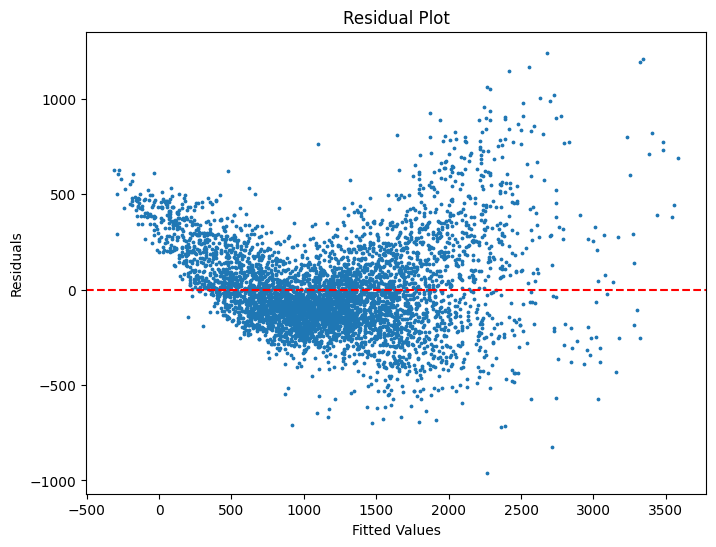

In [ ]:
# Create a plot of model residual against model outputs (i.e., Y_hat) values
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, model.resid, s=3)
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.show()

##### Interpretation:

- Indicates non-linearity: A U-shaped pattern in residuals suggests the actual relationship between variables isn't linear.
- Model inadequacy: The current model fails to capture the curve in the data, systematically overestimating or underestimating values.
- Potential remedies: Consider polynomial regression, variable transformations, or a more complex, non-linear model.